In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/thomassimmons/c/d/datasets/dirty_cafe_sales.csv")

In [3]:
df.shape

(10000, 8)

In [4]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [12]:
df.dtypes

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

In [6]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors = 'coerce')

In [8]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors = 'coerce')

In [10]:
df['Quantity'] = pd.to_numeric(df['Total Spent'], errors = 'coerce')

In [11]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors = 'coerce')

In [14]:
df['Payment Method'] = df['Payment Method'].replace("UNKNOWN", pd.NA)
df['Location'] = df['Location'].replace('UNKNOWN', pd.NA)

In [16]:
df = df.dropna(subset=['Total Spent', 'Payment Method', 'Location'])

In [17]:
df.shape

(4361, 8)

In [34]:
df.reset_index(drop=True)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,4.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,12.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_3160411,Coffee,4.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
3,TXN_2548360,Salad,25.0,5.0,25.0,Cash,Takeaway,2023-11-07
4,TXN_7619095,Sandwich,8.0,4.0,8.0,Cash,In-store,2023-05-03
...,...,...,...,...,...,...,...,...
3686,TXN_9933628,Smoothie,20.0,4.0,20.0,Cash,In-store,2023-07-20
3687,TXN_3142496,Smoothie,4.0,4.0,4.0,Cash,Takeaway,2023-07-27
3688,TXN_2858441,Sandwich,8.0,4.0,8.0,Credit Card,In-store,2023-12-14
3689,TXN_3897619,Sandwich,12.0,4.0,12.0,Cash,Takeaway,2023-02-24


In [20]:
df['Item'] = df['Item'].str.strip().str.title()

In [21]:
df['Item'].head()

0      Coffee
1        Cake
4      Coffee
6     Unknown
10      Salad
Name: Item, dtype: object

In [23]:
df = df[df['Item'] != 'Unknown']

In [35]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,4.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,12.0,3.0,12.0,Cash,In-store,2023-05-16
4,TXN_3160411,Coffee,4.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
10,TXN_2548360,Salad,25.0,5.0,25.0,Cash,Takeaway,2023-11-07
12,TXN_7619095,Sandwich,8.0,4.0,8.0,Cash,In-store,2023-05-03


In [32]:
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [31]:
df = df.dropna(subset=['Item', 'Price Per Unit'])

In [25]:
df.shape

(4219, 8)

In [36]:
df = df.dropna(subset=['Transaction Date'])

In [38]:
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [39]:
df.isnull().values.any()

False

In [40]:
df.isnull().sum().sum()

0

In [41]:
(df == 'Unknown').sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [53]:
(df == 'ERROR').sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [54]:
df.shape

(3346, 8)

In [75]:
df = df[~df['Payment Method'].str.strip().str.lower().eq('error')]
df = df[~df['Location'].str.strip().str.lower().eq('error')]
df = df[~df['Location'].str.strip().str.lower().eq('error')]

In [57]:
df['Item'].value_counts().head(10)

Item
Juice       441
Salad       436
Sandwich    418
Cookie      411
Cake        404
Tea         391
Coffee      383
Smoothie    350
Error       112
Name: count, dtype: int64

In [58]:
df['Payment Method'].value_counts(normalize=True)

Payment Method
Digital Wallet    0.348177
Cash              0.326360
Credit Card       0.325463
Name: proportion, dtype: float64

In [60]:
df['Month'] = df['Transaction Date'].dt.to_period('M')

In [61]:
df.dtypes

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
Month                    period[M]
dtype: object

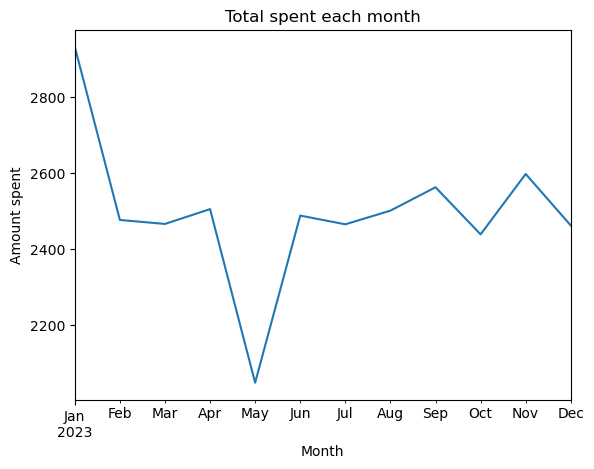

In [67]:
df.groupby('Month')['Total Spent'].sum().plot(kind='line')
plt.title("Total spent each month")
plt.ylabel("Amount spent")
plt.xlabel("Month")
plt.show()

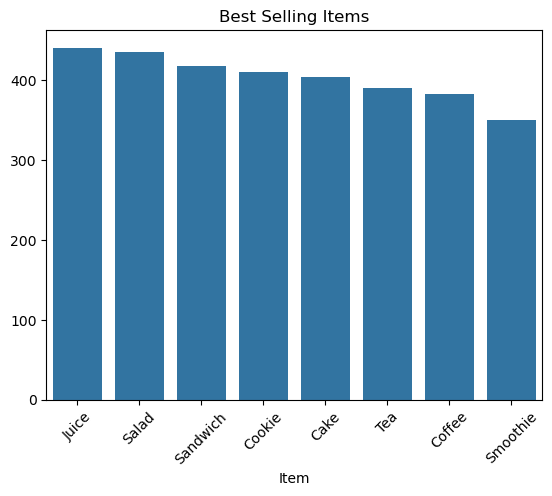

In [84]:
sns.barplot(x=df['Item'].value_counts().index, y=df['Item'].value_counts().values)
plt.xticks(rotation=45)
plt.title("Best Selling Items")
plt.show()

In [79]:
(df == 'Error').sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Month               0
dtype: int64

In [85]:
df = df[df['Item'].str.strip().str.lower() != 'error']


In [89]:
print("Average total spent:\n", df['Total Spent'].mean())

Average total spent:
 8.949907235621522


In [90]:
df.to_csv("cleaned_data_sales.csv", index=False)